In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy

In [23]:
def load_logs(base_directory):
    logs_dict = {}

    for file_name in os.listdir(base_directory):
        file_path = os.path.join(base_directory, file_name)
        if file_name.endswith('.csv'):
            df = pd.read_csv(file_path)

        logs_dict[file_name] = df

    return logs_dict


all_logs = load_logs("data")

In [21]:
def calc_ki(means, alpha=0.05):
    c = scipy.stats.norm.ppf(1 - alpha / 2, loc=0, scale=1)
    s = np.std(means, ddof=1)
    mean = np.mean(means)
    erg = (s * c) / np.sqrt(len(means))
    return [mean - erg, mean + erg]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Erstelle Scatterplot für Ordner: T1_spinlock_min_times.csv
Scatterplot für T1_spinlock_min_times.csv gespeichert als scatterplot_T1_spinlock_min_times.csv.eps


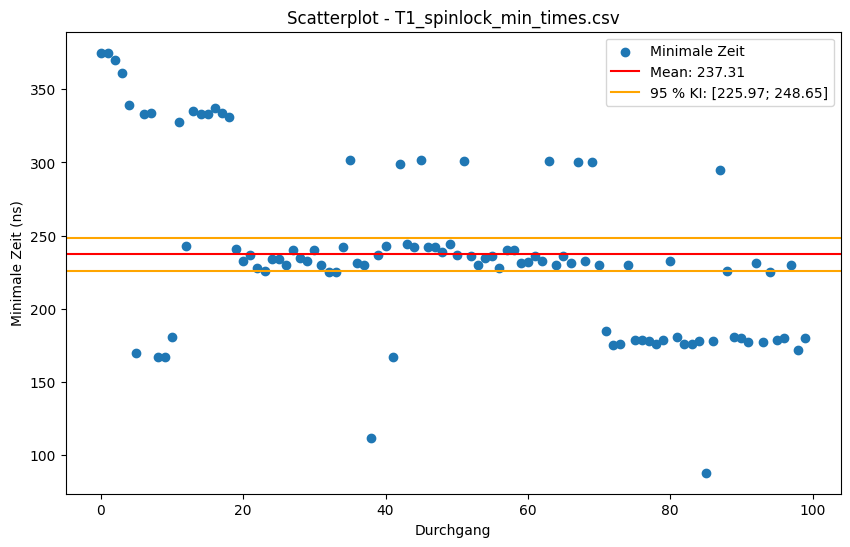

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Erstelle Scatterplot für Ordner: T1_spinlock_sm_min_times.csv
Scatterplot für T1_spinlock_sm_min_times.csv gespeichert als scatterplot_T1_spinlock_sm_min_times.csv.eps


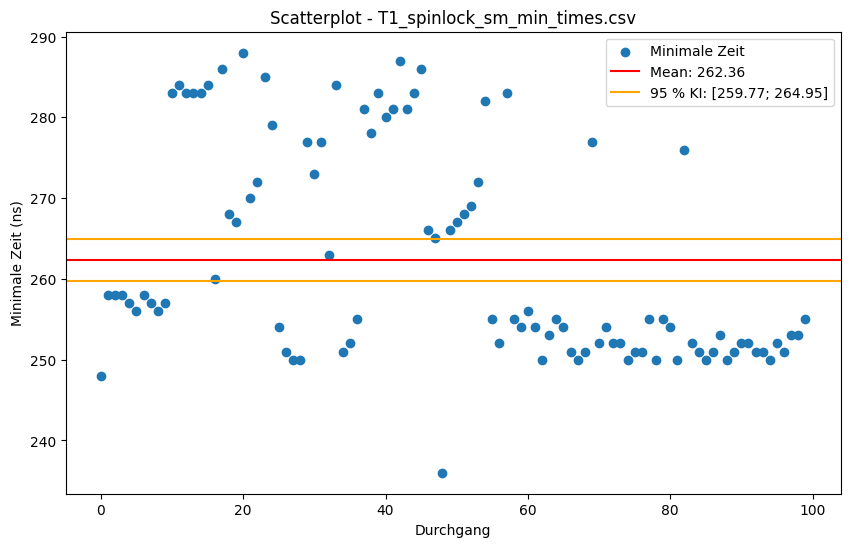

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Erstelle Scatterplot für Ordner: T2_semaphore_min_times.csv
Scatterplot für T2_semaphore_min_times.csv gespeichert als scatterplot_T2_semaphore_min_times.csv.eps


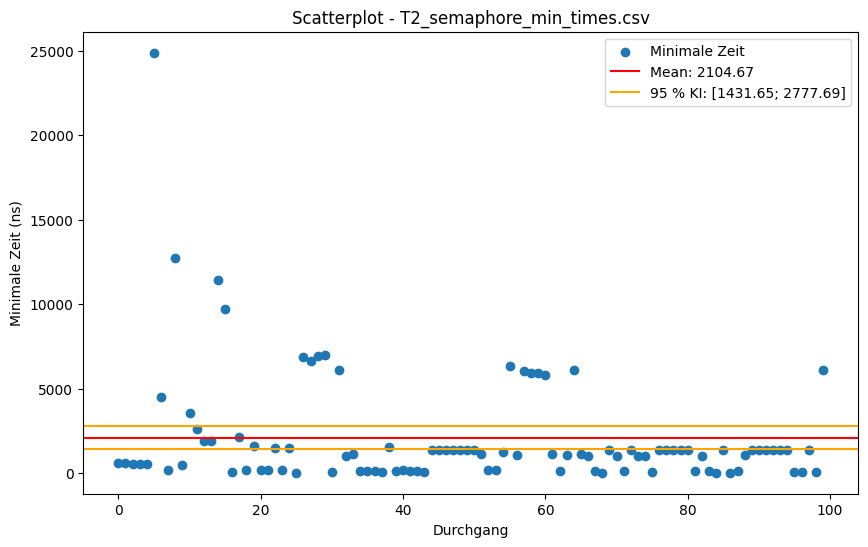

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Erstelle Scatterplot für Ordner: T3_zmq_inproc_min_times.csv
Scatterplot für T3_zmq_inproc_min_times.csv gespeichert als scatterplot_T3_zmq_inproc_min_times.csv.eps


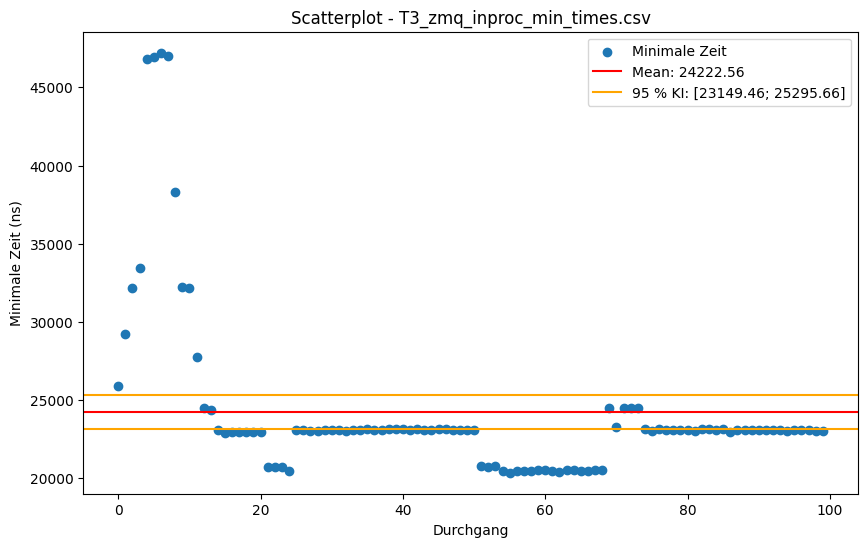

Erstelle Scatterplot für Ordner: T3_zmq_ipc_min_times.csv


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Scatterplot für T3_zmq_ipc_min_times.csv gespeichert als scatterplot_T3_zmq_ipc_min_times.csv.eps


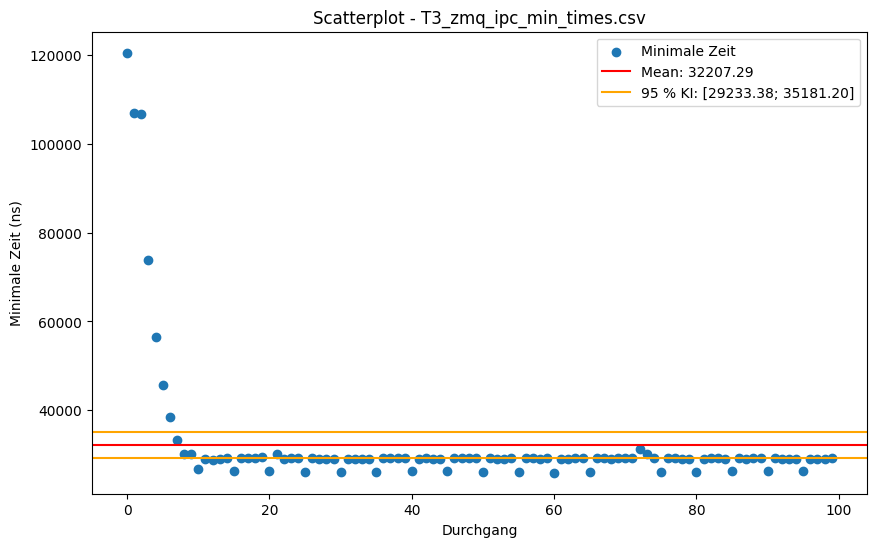

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Erstelle Scatterplot für Ordner: T4_tcp_min_times.csv
Scatterplot für T4_tcp_min_times.csv gespeichert als scatterplot_T4_tcp_min_times.csv.eps


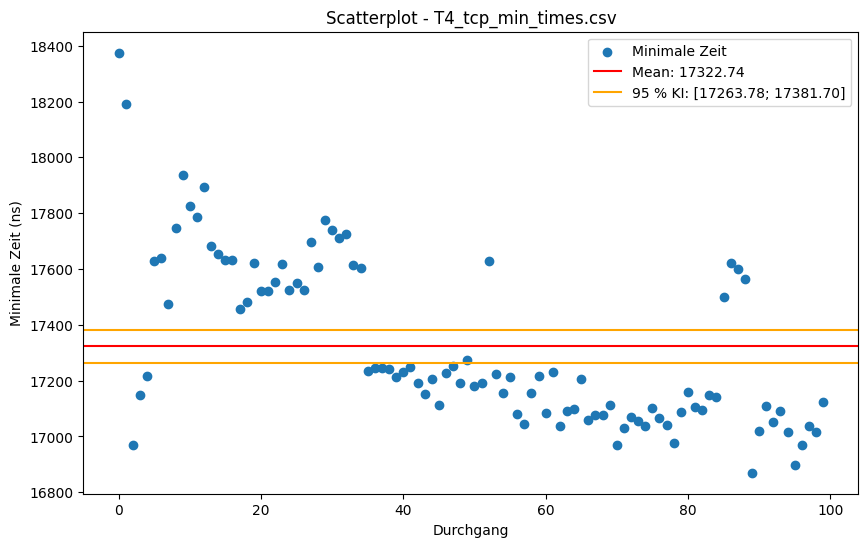

In [31]:
import matplotlib.pyplot as plt

def plot_scatter(eventlogs_dict):
    for folder_name, log in eventlogs_dict.items():
        print(f"Erstelle Scatterplot für Ordner: {folder_name}")

        times = log['mintime']
        ki = calc_ki(times)  # Annahme: Diese Funktion ist definiert
        mean = times.mean()

        # Erstellen eines neuen Plots
        plt.figure(figsize=(10, 6))
        plt.scatter(range(len(times)), times, label='Minimale Zeit')

        # Gesamtdurchschnitt als horizontale Linie einzeichnen
        plt.axhline(mean, color='red', label=f'Mean: {mean:.2f}')
        plt.axhline(ki[0], color='orange', label=f'95 % KI: [{ki[0]:.2f}; {ki[1]:.2f}]')
        plt.axhline(ki[1], color='orange')

        # Titel, Achsenbeschriftung und Legende
        plt.title(f"Scatterplot - {folder_name}")
        plt.xlabel("Durchgang")
        plt.ylabel("Minimale Zeit (ns)")
        plt.legend()

        # Speichern der Grafik
        filename = f"scatterplot_{folder_name.replace(' ', '_')}.eps"
        plt.savefig(filename, format='eps')
        print(f"Scatterplot für {folder_name} gespeichert als {filename}")
        plt.show()
        # Schließen der Grafik, um Speicher freizugeben
        plt.close()

# Beispielaufruf
plot_scatter(all_logs)


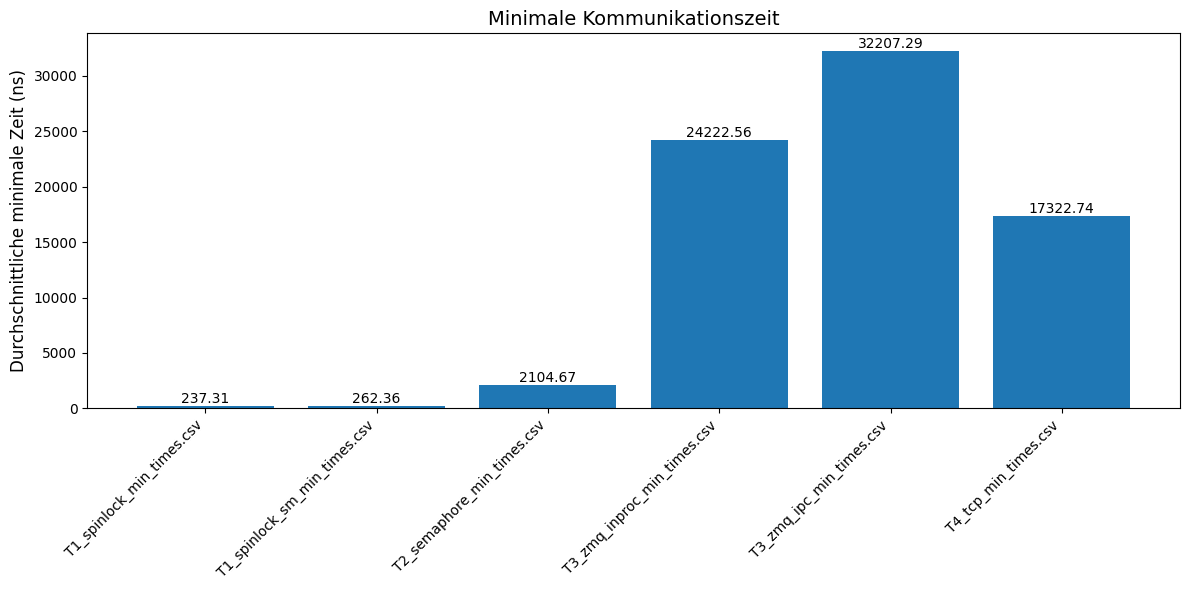

In [37]:
def plot_bar(eventlogs_dict):
    # Extrahiere die Keys (Ordnernamen) und deren Mittelwerte
    folder_names = list(eventlogs_dict.keys())
    mean_values = [log['mintime'].mean() for log in eventlogs_dict.values()]

    # Barplot erstellen
    plt.figure(figsize=(12, 6))
    bars = plt.bar(range(len(folder_names)), mean_values)

    # X-Achsen-Beschriftungen (Ordnernamen)
    plt.xticks(range(len(folder_names)), folder_names, rotation=45, ha="right")

    # Achsentitel und Plot-Titel
    plt.ylabel("Durchschnittliche minimale Zeit (ns)", fontsize=12)
    plt.title("Minimale Kommunikationszeit", fontsize=14)

    # Werte oberhalb der Bars anzeigen
    for bar, value in zip(bars, mean_values):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}',
                 ha='center', va='bottom', fontsize=10)

    # Speichern und anzeigen
    plt.tight_layout()
    plt.savefig("barplot_means.eps", format='eps')
    plt.show()

# Beispielaufruf
plot_bar(all_logs)
